In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df_movies = pd.read_csv('../data/df_movies_limpio.csv')
df_cast = pd.read_csv('../data/df_credits_cast.csv')
df_crew = pd.read_csv('../data/df_credits_crew.csv')

# Índice

1. [Chequeo de nulos](#chequeo-de-nulos)
2. [Valores duplicados](#valores-duplicados)
3. [Valores faltantes](#valores-faltantes)
4. [Tipos de datos](#tipos-de-datos)
5. [Análisis Outlier](#analisis-outlier)
6. [Análisis estadístico de datos](#analisis-estadistico-de-datos)
7. [Análisis de correlaciones bi y multivariado](#analisis-de-correlaciones-bi-y-multivariado)

---

### **Chequeo de nulos**

<Axes: >

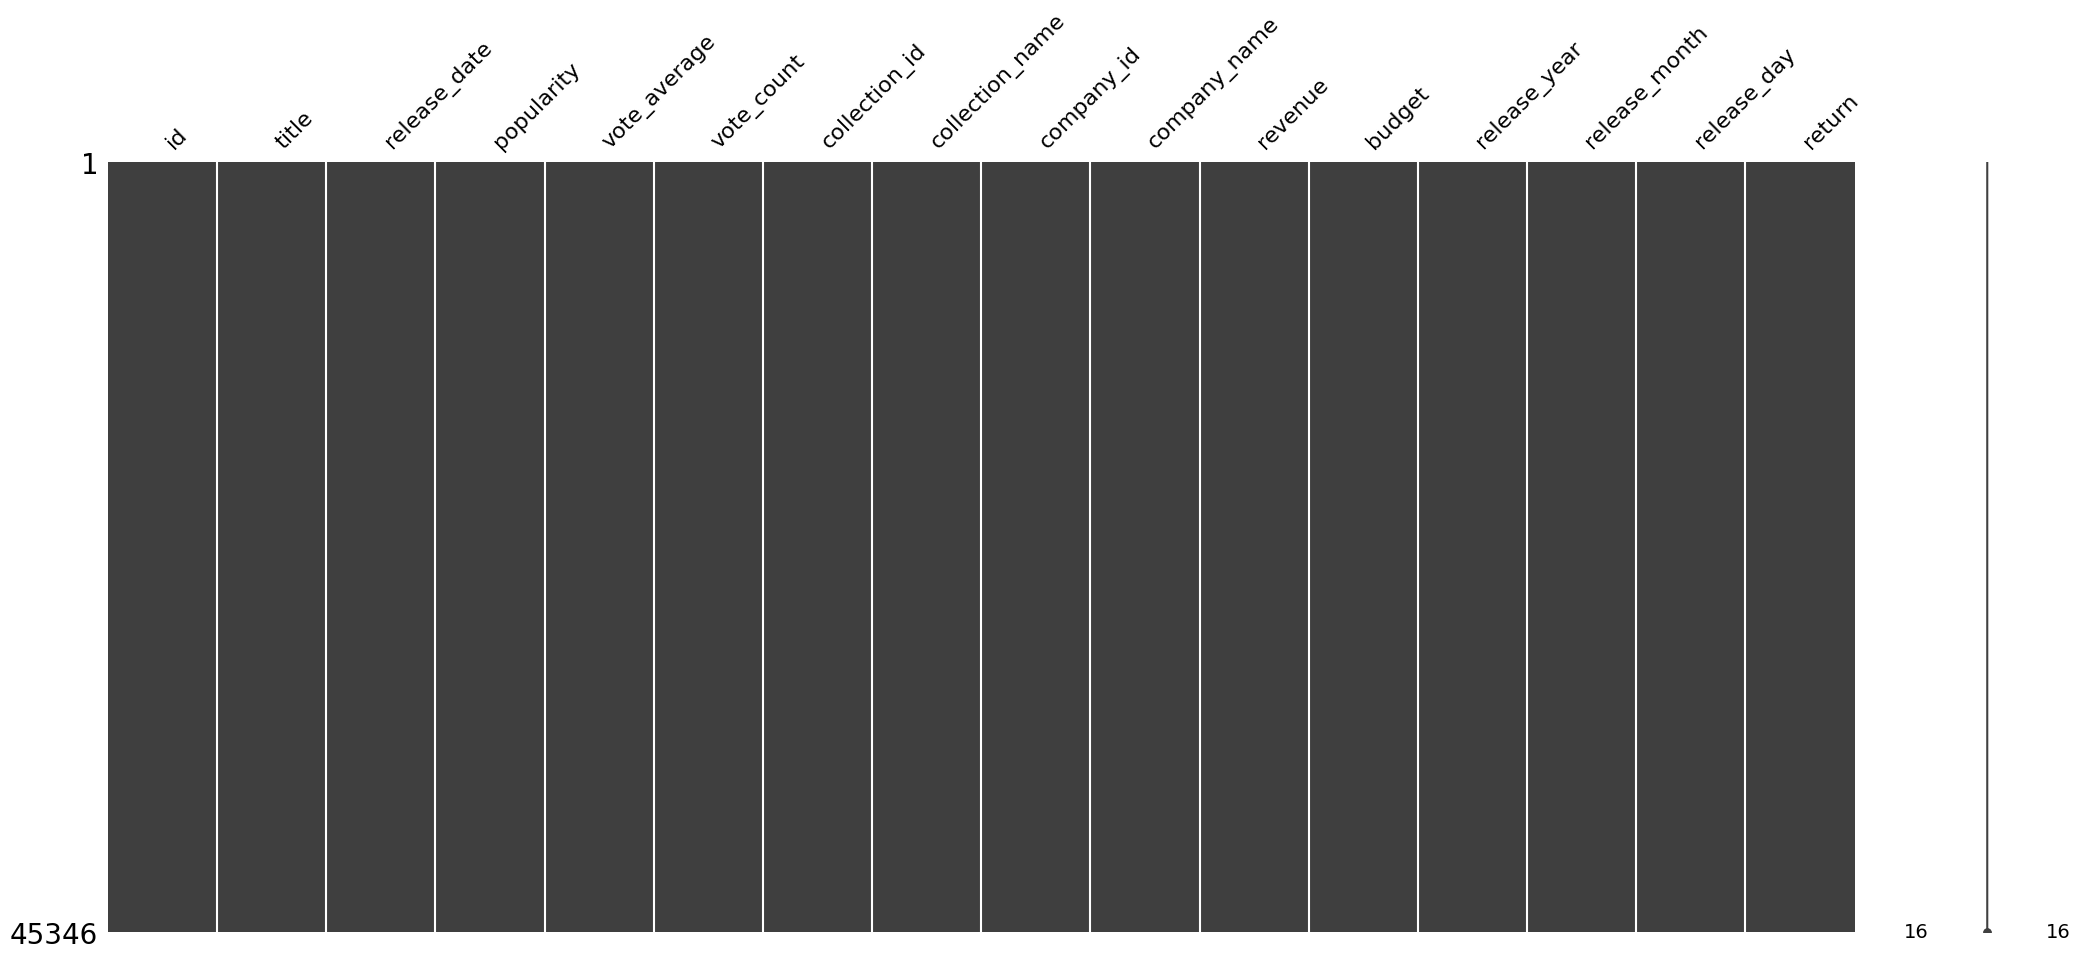

In [7]:
msno.matrix(df_movies)

<Axes: >

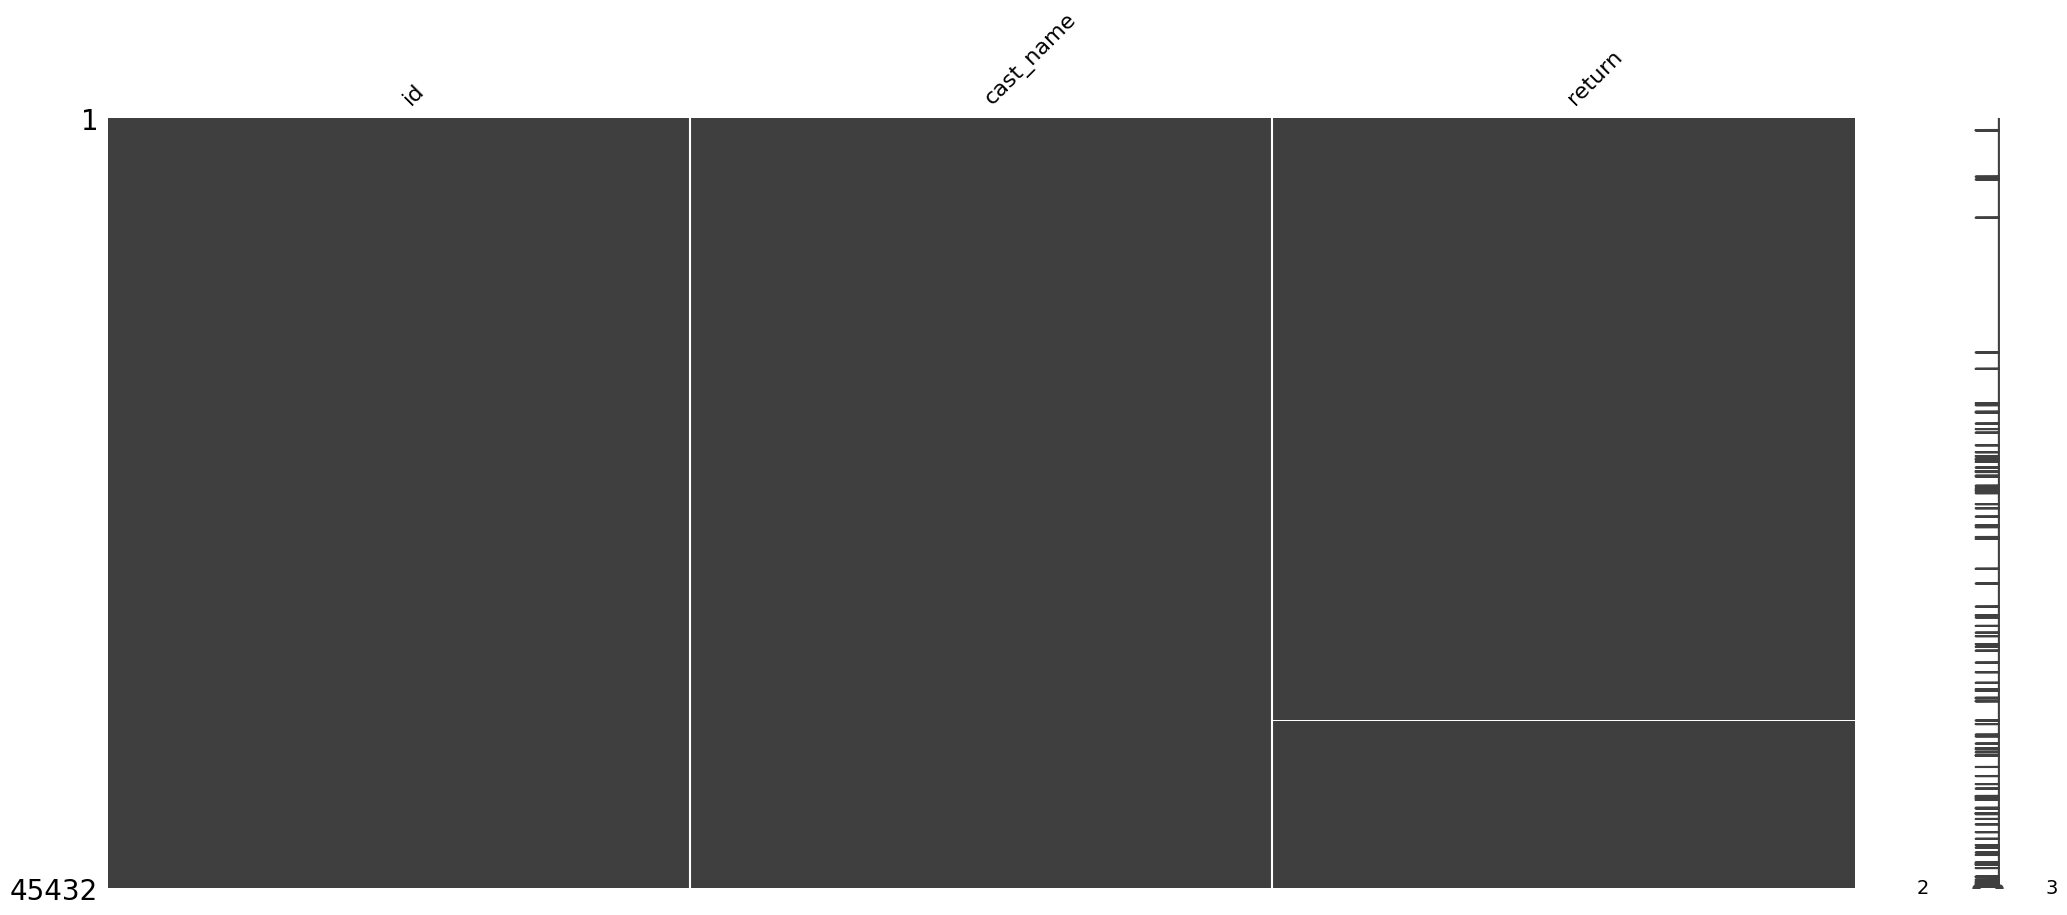

In [8]:
msno.matrix(df_cast)

<Axes: >

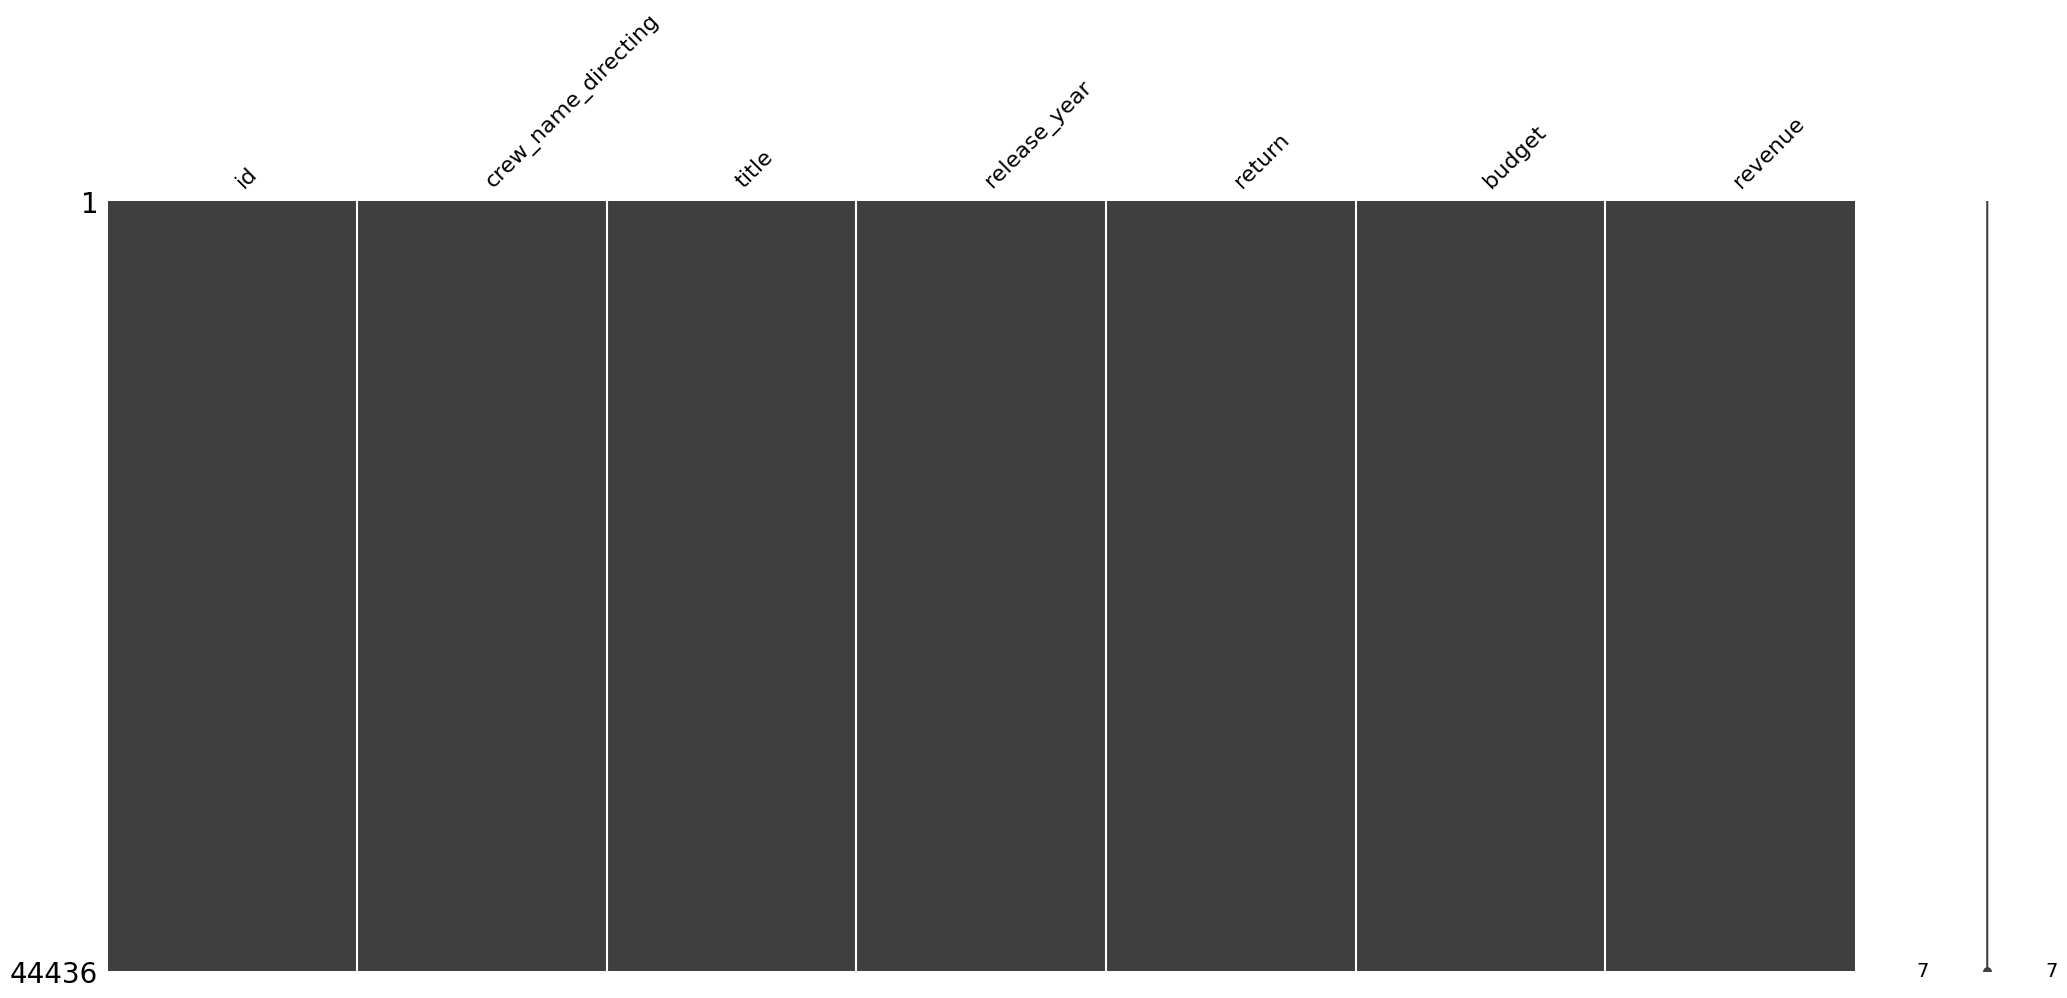

In [9]:
msno.matrix(df_crew)

Podemos ver que en ningun df tenemos valores nulos, de lo contrario veriamos pequeñas lineas blancas dentro de el indicando lo contrario.

### **Valores duplicados**

In [13]:
duplicados_movies = df_movies[df_movies.duplicated()]
duplicados_cast = df_cast[df_cast.duplicated()]
duplicados_crew = df_crew[df_crew.duplicated()]

In [16]:
print(duplicados_movies)
print(duplicados_cast)
print(duplicados_crew)

Empty DataFrame
Columns: [id, title, release_date, popularity, vote_average, vote_count, collection_id, collection_name, company_id, company_name, revenue, budget, release_year, release_month, release_day, return]
Index: []
Empty DataFrame
Columns: [id, cast_name, return]
Index: []
Empty DataFrame
Columns: [id, crew_name_directing, title, release_year, return, budget, revenue]
Index: []


### **Valores Faltantes '0'**

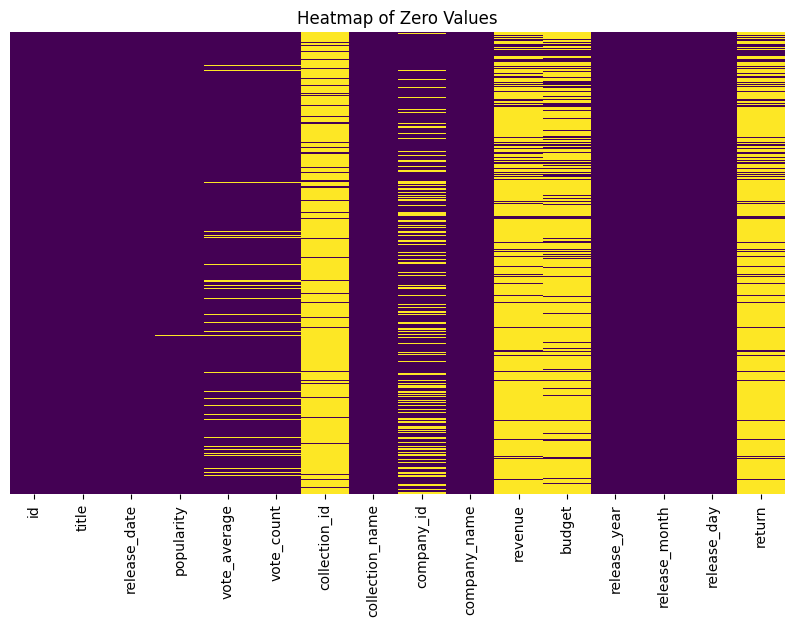

In [17]:
def plot_zeros(data):
    zeros = (data == 0).astype(int)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(zeros, cbar=False, cmap='viridis', yticklabels=False)
    ax.set_title('Heatmap of Zero Values')
    plt.show()

# Visualizar los valores 0
plot_zeros(df_movies)

In [9]:
df_movies

,id,title,release_date,popularity,vote_average,vote_count,collection_id,collection_name,company_id,company_name,revenue,budget,release_year,release_month,release_day,return
0,862,toy story,1995-10-30,21.946943,7.7,5415,10194,Toy Story Collection,3,Pixar Animation Studios,373554033,30000000,1995,octubre,lunes,1.245200e+01
1,8844,jumanji,1995-12-15,17.015539,6.9,2413,0,0,559,TriStar Pictures,262797249,65000000,1995,diciembre,viernes,4.043000e+00
2,15602,grumpier old men,1995-12-22,11.712900,6.5,92,119050,Grumpy Old Men Collection,6194,Warner Bros.,0,0,1995,diciembre,viernes,0.000000e+00
3,31357,waiting to exhale,1995-12-22,3.859495,6.1,34,0,0,306,Twentieth Century Fox Film Corporation,81452156,16000000,1995,diciembre,viernes,5.091000e+00
4,11862,father of the bride part ii,1995-02-10,8.387519,5.7,173,96871,Father of the Bride Collection,5842,Sandollar Productions,76578911,0,1995,febrero,viernes,7.657891e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45341,30840,robin hood,1991-05-13,5.683753,5.7,26,0,0,7025,Westdeutscher Rundfunk (WDR),0,0,1991,mayo,lunes,0.000000e+00
45342,111109,century of birthing,2011-11-17,0.178241,9.0,3,0,0,19653,Sine Olivia,0,0,2011,noviembre,jueves,0.000000e+00
45343,67758,betrayal,2003-08-01,0.903007,3.8,6,0,0,6165,American World Pictures,0,0,2003,agosto,viernes,0.000000e+00
45344,227506,satan triumphant,1917-10-21,0.003503,0.0,0,0,0,88753,Yermoliev,0,0,1917,octubre,domingo,0.000000e+00


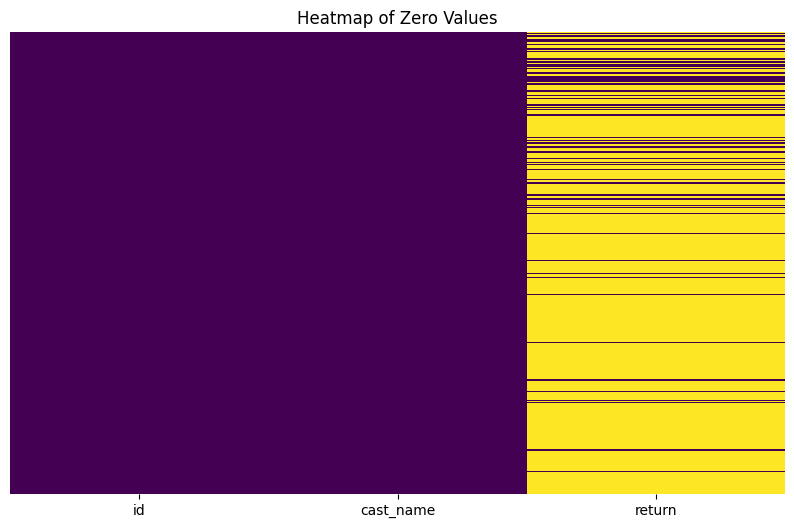

In [19]:
def plot_zeros(data):
    zeros = (data == 0).astype(int)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(zeros, cbar=False, cmap='viridis', yticklabels=False)
    ax.set_title('Heatmap of Zero Values')
    plt.show()

# Visualizar los valores 0
plot_zeros(df_cast)

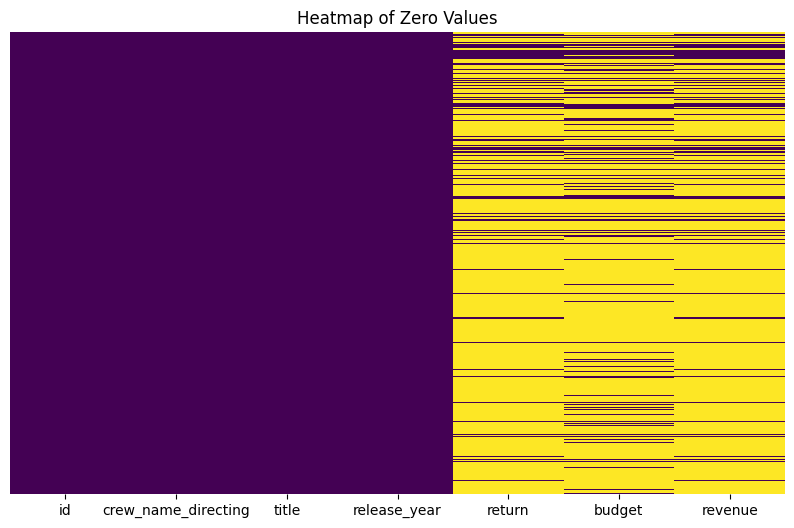

In [20]:
def plot_zeros(data):
    zeros = (data == 0).astype(int)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(zeros, cbar=False, cmap='viridis', yticklabels=False)
    ax.set_title('Heatmap of Zero Values')
    plt.show()

# Visualizar los valores 0
plot_zeros(df_crew)

### **Tipos de datos**

In [32]:
print(df_movies.dtypes)


id                   int64
title               object
release_date        object
popularity         float64
vote_average       float64
vote_count           int64
collection_id        int64
collection_name     object
company_id           int64
company_name        object
revenue              int64
budget               int64
release_year         int64
release_month       object
release_day         object
return             float64
dtype: object


In [33]:
print(df_cast.dtypes)

id             int64
cast_name     object
return       float64
dtype: object


In [34]:
print(df_crew.dtypes)

id                       int64
crew_name_directing     object
title                   object
release_year             int64
return                 float64
budget                   int64
revenue                  int64
dtype: object


### **Analisis Outliers**

In [95]:
df_movies_copia = df_movies.copy() 
df_cast_copia = df_cast.copy()
df_crew_copia = df_crew.copy()

In [9]:
df_movies.columns

Index(['id', 'title', 'release_date', 'popularity', 'vote_average',
       'vote_count', 'collection_id', 'collection_name', 'company_id',
       'company_name', 'revenue', 'budget', 'release_year', 'release_month',
       'release_day', 'return'],
      dtype='object')

La mediana cercana a cero se debe a que hay al menos 2000 valores con popularidad baja, 

In [ ]:
df_movies = df_movies[~((df_movies['popularity'] < 1) & (df_movies['vote_count'] <= 20))]
df_movies = df_movies[~(df_movies['vote_average'] < 1)]
df_movies 

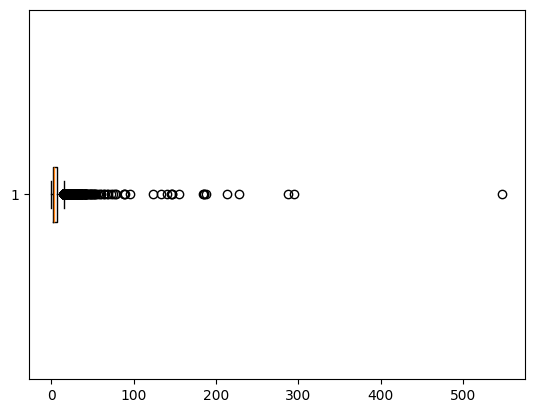

In [74]:
plt.boxplot(df_movies['popularity'], vert = False)
plt.show()


Calculamos los datos estadisticos

In [75]:
Q1  = df_movies['popularity'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_movies['popularity'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_movies['popularity'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_movies['popularity'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_movies['popularity'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q1 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)

Primer Cuartil:  1.6666405
Tercer Cuartil:  7.031808
Rango Intercuartil:  5.3651675
Mediana:  3.2901435
Valor minimo:  0.000844
Valor maximo:  547.488298
Bigote inferior:  -6.381110750000001
Bigote superior:  9.71439175


Ubicamos los outliers

In [76]:
ubicacion_outliers = (df_movies['popularity'] < BI_calculado) | (df_movies['popularity'] > BS_calculado)
outliers = df_movies[ubicacion_outliers]
outliers = outliers.sort_values('popularity')
lista_outliers = outliers['popularity'].tolist()
print(outliers['popularity'])

499        9.715187
204        9.715639
15988      9.715790
11993      9.718111
1229       9.718713
            ...    
24410    213.849907
43540    228.032744
42124    287.253654
33295    294.337037
30644    547.488298
Name: popularity, Length: 3233, dtype: float64


In [69]:
#fila de chequeo
#fila_sospechosa = df_movies.loc[df_movies['popularity'].isin(lista_outliers)]
fila_sospechosa = df_movies.loc[df_movies['popularity'] == 547.488298]

fila_sospechosa

,id,title,release_date,popularity,vote_average,vote_count,collection_id,collection_name,company_id,company_name,revenue,budget,release_year,release_month,release_day,return
30644,211672,minions,2015-06-17,547.488298,6.4,4729,86066,Despicable Me Collection,33,Universal Pictures,1156730962,74000000,2015,junio,miércoles,15.631


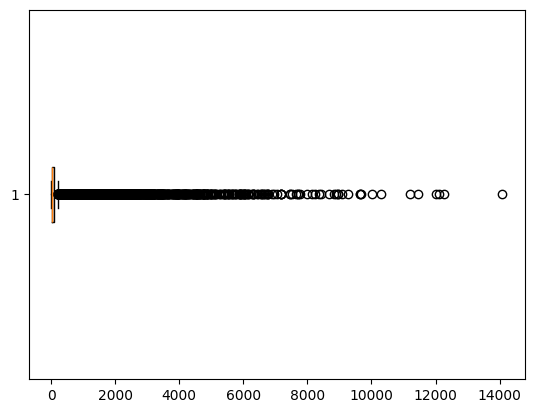

In [93]:
plt.boxplot(df_movies['vote_count'], vert = False)
plt.show()

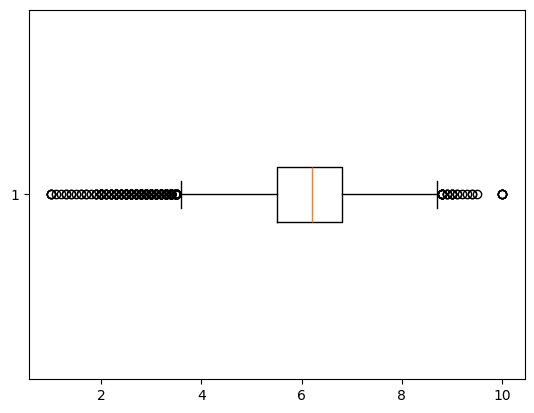

In [94]:
plt.boxplot(df_movies['vote_average'], vert = False)
plt.show()

In [98]:
df_movies.to_csv('df_movies_limpio.csv',index =False)

Luego de ubicar los outliers vemos que aunque hay bastantes, ninguno parece afectar directamente nuestro sistema de recomendacion.

### **Analisis estadistico**

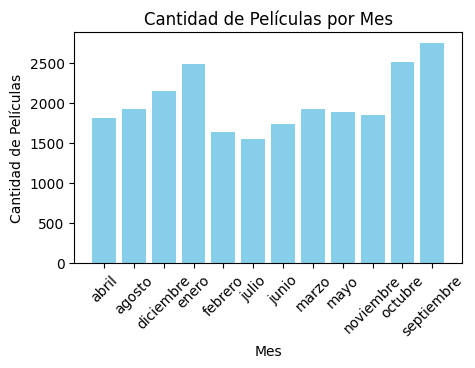

In [100]:
movies_per_month = df_movies['release_month'].value_counts().sort_index()
plt.figure(figsize=(5, 3))  
plt.bar(movies_per_month.index, movies_per_month.values, color='skyblue')

plt.xlabel('Mes')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas por Mes')

plt.xticks(rotation=45)  # Rotar los nombres de los meses si es necesario

plt.show()

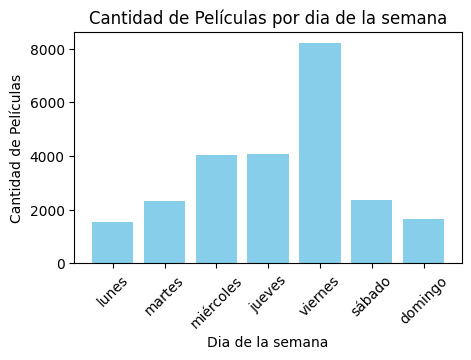

In [101]:
days_order = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']


movies_per_day = df_movies['release_day'].value_counts().reindex(days_order, fill_value = 0)
plt.figure(figsize=(5, 3))  
plt.bar(movies_per_day.index, movies_per_day.values, color='skyblue')

plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas por dia de la semana')

plt.xticks(rotation=45)  # Rotar los nombres de los meses si es necesario

plt.show()

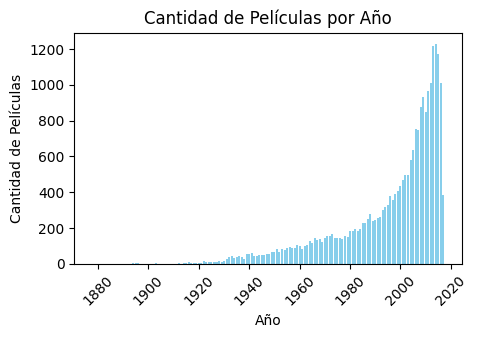

In [102]:
movies_per_year = df_movies['release_year'].value_counts().sort_index()
plt.figure(figsize=(5, 3))  
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue')

plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas por Año')

plt.xticks(rotation=45)  # Rotar los nombres de los meses si es necesario

plt.show()

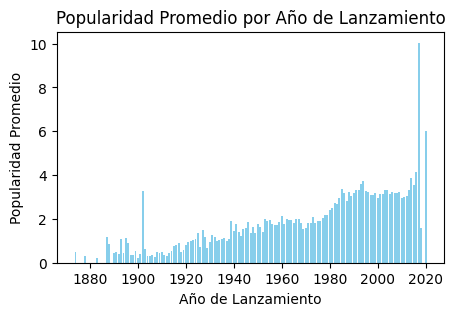

In [5]:
popularidad_df = df_movies.groupby('release_year')['popularity'].mean().reset_index()
plt.figure(figsize=(5, 3))
plt.bar(popularidad_df['release_year'], popularidad_df['popularity'], color='skyblue')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Popularidad Promedio')
plt.title('Popularidad Promedio por Año de Lanzamiento')

plt.show()

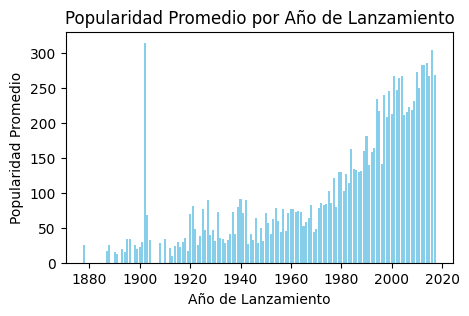

In [103]:
votos_df = df_movies.groupby('release_year')['vote_count'].mean().reset_index()
plt.figure(figsize=(5, 3))
plt.bar(votos_df['release_year'], votos_df['vote_count'], color='skyblue')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Popularidad Promedio')
plt.title('Popularidad Promedio por Año de Lanzamiento')

plt.show()

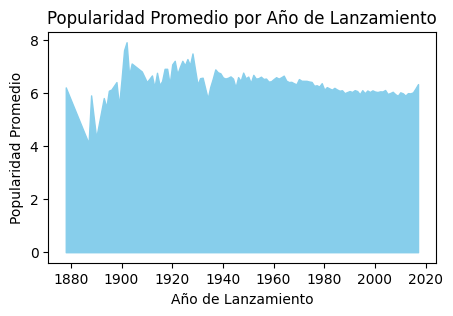

In [106]:
votos_rate_df = df_movies.groupby('release_year')['vote_average'].mean().reset_index()
plt.figure(figsize=(5, 3))
plt.fill_between(votos_rate_df['release_year'], votos_rate_df['vote_average'], color='skyblue')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Popularidad Promedio')
plt.title('Popularidad Promedio por Año de Lanzamiento')

plt.show()

### **Analisis de correlaciones bi y multivariado**

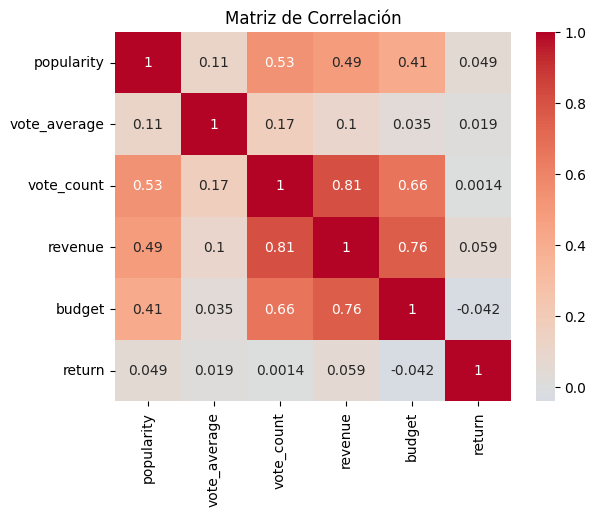

In [116]:
columnas_interes = ['popularity','vote_average','vote_count','revenue','budget','return']
df_movies_columnas_interes = df_movies[columnas_interes]
correlation_matrix = df_movies_columnas_interes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()